In [ ]:
#01 — Data Cleaning

In [11]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data_science_job_posts_2025.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Convert post_date (e.g., "17 days ago", "a month ago")
def convert_post_date(text):
    text = str(text).lower()

    if 'hour' in text:
        return 0
    elif 'day' in text:
        return 1 if text.startswith('a') else int(text.split()[0])
    elif 'week' in text:
        return 7 if text.startswith('a') else int(text.split()[0]) * 7
    elif 'month' in text:
        return 30 if text.startswith('a') else int(text.split()[0]) * 30
    else:
        return None

df['days_since_posted'] = df['post_date'].apply(convert_post_date)

# Salary cleaning (€100,000 - €200,000 or €120,000)
def clean_salary(s):
    s = str(s).replace('€','').replace(',','')
    if '-' in s:
        low, high = s.split('-')
        return (float(low) + float(high)) / 2
    try:
        return float(s)
    except:
        return np.nan

df['avg_salary'] = df['salary'].apply(clean_salary)

# Convert skills string to list
def parse_skills(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['skills'] = df['skills'].apply(parse_skills)

# Remove duplicates
df.drop_duplicates(
    subset=[
        'job_title',
        'company',
        'location',
        'seniority_level',
        'status'
    ],
    inplace=True
)

# Save cleaned data
df.to_csv('cleaned_jobs.csv', index=False)

print("Data cleaning completed successfully.")


Data cleaning completed successfully.


In [ ]:
#02 — Exploratory Data Analysis

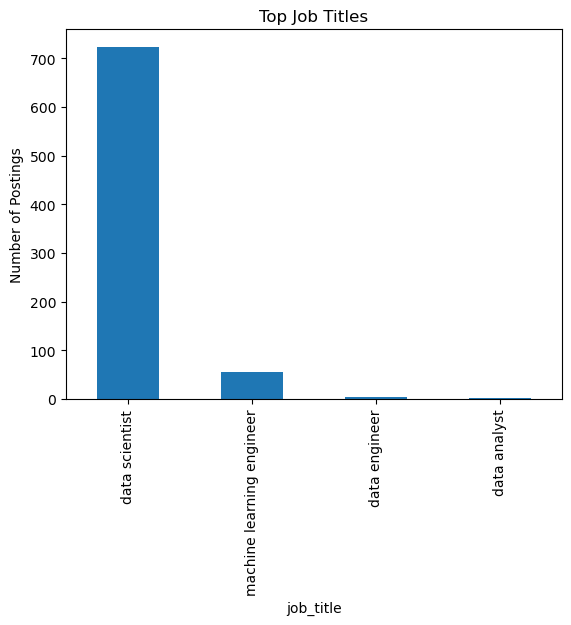

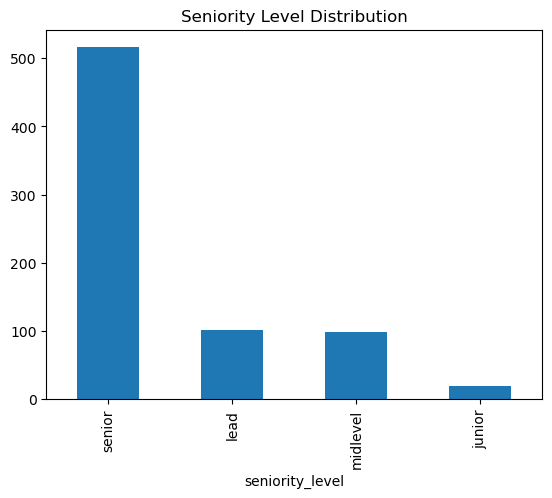

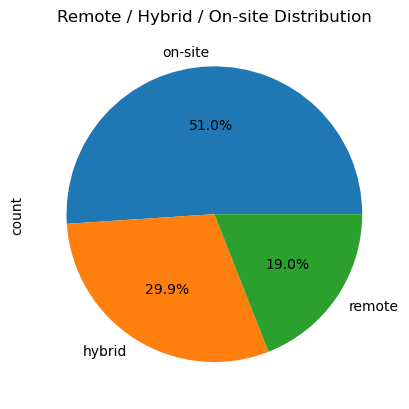

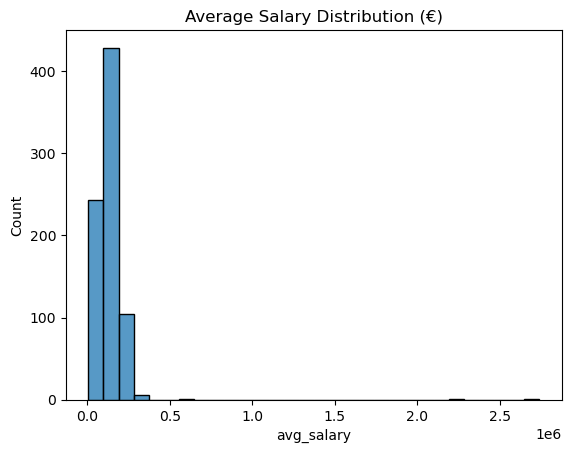

In [13]:
df = pd.read_csv('cleaned_jobs.csv')

# Job title distribution
df['job_title'].value_counts().head(10).plot(kind='bar')
plt.title("Top Job Titles")
plt.ylabel("Number of Postings")
plt.show()

# Seniority level distribution
df['seniority_level'].value_counts().plot(kind='bar')
plt.title("Seniority Level Distribution")
plt.show()

# Work mode
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Remote / Hybrid / On-site Distribution")
plt.show()

# Salary distribution
sns.histplot(df['avg_salary'].dropna(), bins=30)
plt.title("Average Salary Distribution (€)")
plt.show()


In [ ]:
03 — Skill Demand Analysis (Core Highlight)

In [15]:
from collections import Counter

df = pd.read_csv('cleaned_jobs.csv')

skill_counter = Counter()

for skills in df['skills']:
    for skill in skills:
        skill_counter[skill.lower()] += 1

skill_df = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Demand'])
skill_df.sort_values(by='Demand', ascending=False, inplace=True)

skill_df.head(15)


,Skill,Demand
1,',6958
8,,3501
7,",",2860
13,n,2758
4,a,2652
18,e,2153
5,r,1678
15,l,1487
17,i,1445
3,p,1257


In [ ]:
#04 — Job Market Trends

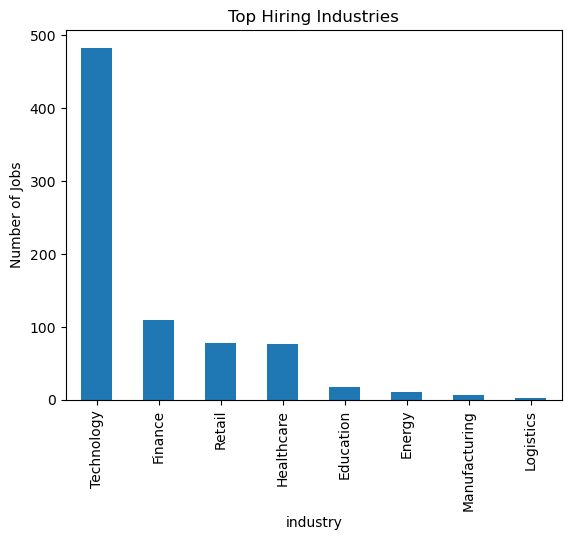

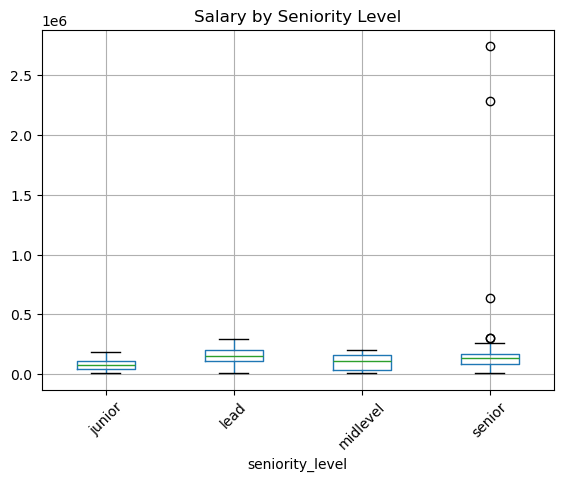

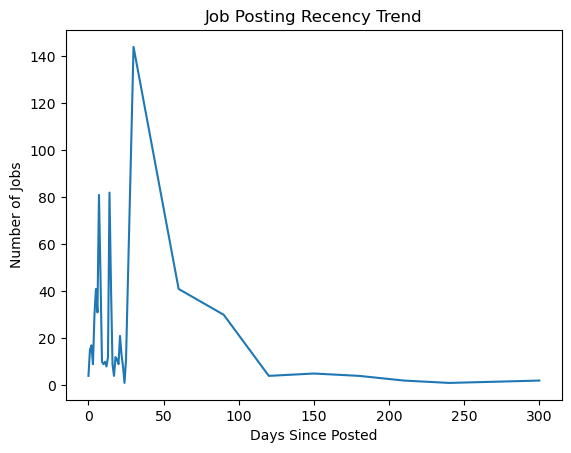

In [17]:
df = pd.read_csv('cleaned_jobs.csv')

# Industry-wise demand
df['industry'].value_counts().head(10).plot(kind='bar')
plt.title("Top Hiring Industries")
plt.ylabel("Number of Jobs")
plt.show()

# Salary by seniority
df.boxplot(column='avg_salary', by='seniority_level', rot=45)
plt.title("Salary by Seniority Level")
plt.suptitle("")
plt.show()

# Job freshness
df['days_since_posted'].value_counts().sort_index().plot()
plt.title("Job Posting Recency Trend")
plt.xlabel("Days Since Posted")
plt.ylabel("Number of Jobs")
plt.show()
